In [7]:
import os
import numpy as np
from matplotlib import pyplot as plt
import json
import pandas as pd
plt.rcParams['font.size'] = '24'

# Sample complexity v.s. probability of a failure

In [13]:
os.listdir('1000_detailed')

['2.0.json',
 '2.2222222222222223.json',
 '2.4444444444444446.json',
 '2.6666666666666665.json',
 '2.888888888888889.json',
 '3.111111111111111.json',
 '3.333333333333333.json',
 '3.5555555555555554.json',
 '3.7777777777777777.json',
 '4.0.json']

In [14]:
data_tau = {}
for file in os.listdir('1000_detailed'):
    if '.json' in file and 'J_' not in file:
        with open('1000_detailed/' + file, 'r') as fp:
            data_tau[file.split('.json')[0]] = json.load(fp)


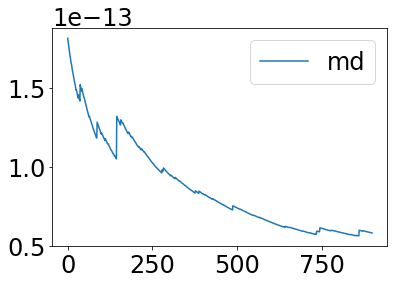

In [181]:
tau__ = '2.888888888888889'
tau__ = '4.0'
prob = data_tau[tau__]['MD_exp'][-1]
#plt.plot(np.array(data_tau[tau__]['ALOE_std'])[100:] * prob, label='aloe')
plt.plot(np.array(data_tau[tau__]['MD_std'])[100:] * prob, label='md')
#plt.plot(data_tau[tau__]['MC_exp'], label='mc')
plt.legend()

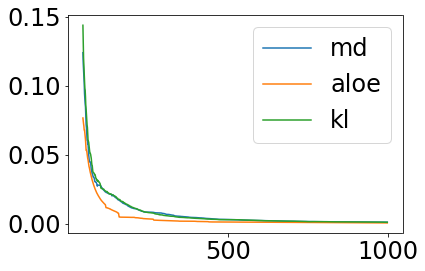

In [241]:
tau__ = list(data_tau.keys())[9]
plt.plot(pd.Series(np.abs(np.array(data_tau[tau__]['MD_std'])[0:-1] - np.array(data_tau[tau__]['MD_std'])[1:]) / data_tau[tau__]['MD_std'][-1]).rolling(50).median(), label='md')
plt.plot(pd.Series(np.abs(np.array(data_tau[tau__]['ALOE_std'])[0:-1] - np.array(data_tau[tau__]['ALOE_std'])[1:]) / data_tau[tau__]['ALOE_std'][-1]).rolling(50).median(), label='aloe')
plt.plot(pd.Series(np.abs(np.array(data_tau[tau__]['KL_std'])[0:-1] - np.array(data_tau[tau__]['KL_std'])[1:]) / data_tau[tau__]['KL_std'][-1]).rolling(50).median(), label='kl')
#plt.ylim(0, 0.02)
plt.legend()

In [238]:
def get_complexity(stds, tol = 1e-8):
    rm = 50
    stds_diff_over = np.abs(np.array(stds[0:-1]) - np.array(stds[1:])) / stds[-1] 
    stds_rm = pd.Series(stds_diff_over).rolling(rm).median()[rm-1:]
    for i in range(rm, len(stds) - rm):
        if stds_rm[i] <= tol:
        #if np.abs(stds[i] - stds[i + 1]) / stds[-1] <= tol:
            return i

In [242]:
tol =  0.005
complexities = {}
for data_ in data_tau.keys():
    print("TAU = ", data_)
    print("True proba = ", data_tau[data_]['MD_exp'][-1])
    #print("Std[-1] / True proba = ",1/ data_tau[data_]['MD_std'][-1] * data_tau[data_]['MD_exp'][-1])
    compl_tmp = {}
    for key in data_tau[data_].keys():
        method_name = key.split('_')[0]
        if method_name not in compl_tmp.keys():
            #print("METHOD_NAME = ", method_name)
            stds = data_tau[data_][method_name+'_std']
            #exp = data_tau[data_][method_name+'_exp'][-1]
            exps = data_tau[data_][method_name+'_exp']
            compl_tmp[key.split('_')[0]] = get_complexity(exps, tol=tol)
            print(key.split('_')[0], ": ", get_complexity(exps, tol=tol), sep='', end=' ')
#         if '_exp' in key:
#             exp = data_tau[data_][key][-1]
#         if '_std' in key:
#             compl_tmp[key.split('_')[0]] = get_complexity(data_tau[data_][key], exp, tol=0.9 * 1e-3)
#             print(key.split('_')[0], ": ", get_complexity(data_tau[data_][key], exp, tol=0.9 * 1e-3), sep='', end=' ')
    complexities[data_tau[data_]['MD_exp'][-1]] = compl_tmp
    print('\n')

TAU =  2.0
True proba =  0.1383153411335899
MC: 275 MD: 53 KL: 59 ALOE: 67 

TAU =  2.2222222222222223
True proba =  0.08233277886137567
MC: 251 MD: 105 KL: 95 ALOE: 75 

TAU =  2.4444444444444446
True proba =  0.05124960021795218
MC: 194 MD: 79 KL: 77 ALOE: 78 

TAU =  2.6666666666666665
True proba =  0.028322002281491884
MC: 287 MD: 108 KL: 90 ALOE: 74 

TAU =  2.888888888888889
True proba =  0.015067415171166335
MC: 253 MD: 87 KL: 86 ALOE: 72 

TAU =  3.111111111111111
True proba =  0.007832849541733125
MC: 332 MD: 83 KL: 80 ALOE: 91 

TAU =  3.333333333333333
True proba =  0.00377038562594576
MC: 224 MD: 81 KL: 86 ALOE: 87 

TAU =  3.5555555555555554
True proba =  0.0017978181538564272
MC: 247 MD: 99 KL: 93 ALOE: 64 

TAU =  3.7777777777777777
True proba =  0.0008338846842390467
MC: 471 MD: 87 KL: 77 ALOE: 69 

TAU =  4.0
True proba =  0.00033329979003427174
MC: 471 MD: 74 KL: 71 ALOE: 76 



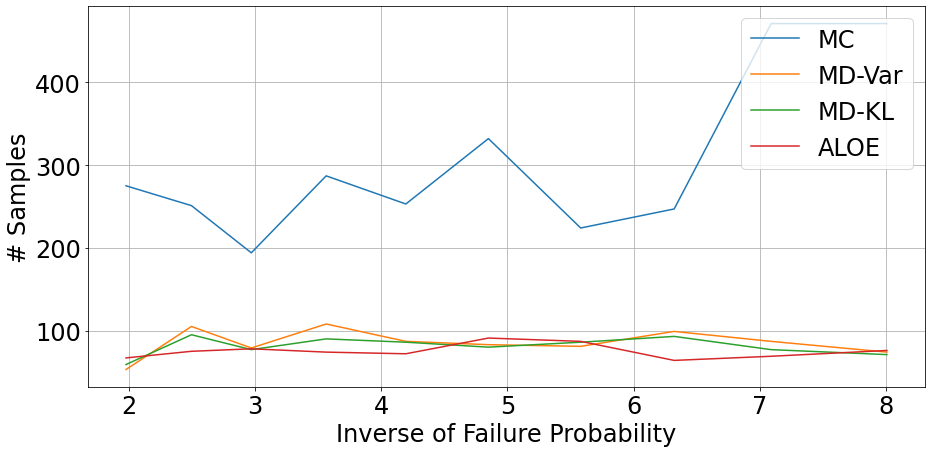

In [249]:
tmp = pd.DataFrame(complexities).T
tmp.sort_index()
tmp.index = np.log(1 / tmp.index)
tmp.columns = ['MC', 'MD-Var', 'MD-KL', 'ALOE']
ax = tmp.plot(figsize=(15, 7), grid=True)
#tmp.plot()
plt.legend(loc='upper right')
#ax.set_xlabel(r'$1 / \Pi$')
ax.set_xlabel('Inverse of Failure Probability')
ax.set_ylabel('# Samples')
plt.savefig('sample_complexity_vs_1overPi.jpg')

# Sample complexity v.s. number of hyperplanes

In [250]:
data_J = {}
for file in os.listdir():
    if '.json' in file and 'J_' in file:
        with open(file, 'r') as fp:
            data_J[file.split('_')[1]] = json.load(fp)


In [251]:
complexities = {}
for data_ in data_J.keys():
    print("J = ", data_)
    print("True proba = ", data_J[data_]['MD_exp'][-1])
    compl_tmp = {}
    for key in data_J[data_].keys():
        
        if '_std' in key:
            compl_tmp[key.split('_')[0]] = get_complexity(data_J[data_][key], tol=0.9 * 1e-3)
            print(key.split('_')[0], ": ", get_complexity(data_J[data_][key], tol=0.9 * 1e-3), sep='', end=' ')
    complexities[int(data_)] = compl_tmp
    print('\n')

J =  1080
True proba =  0.010953679543114131
MC: 1159 MD: 2033 KL: 1832 ALOE: 445 

J =  120
True proba =  0.011082396739373893
MC: 1136 MD: 2076 KL: 1722 ALOE: 956 

J =  180
True proba =  0.010960585225201337
MC: 1148 MD: 1519 KL: 1655 ALOE: 665 

J =  240
True proba =  0.010875196388695925
MC: 1160 MD: 1754 KL: 1754 ALOE: 521 

J =  320
True proba =  0.011016668942175505
MC: 1167 MD: 1884 KL: 1772 ALOE: 1146 

J =  360
True proba =  0.01110074746707919
MC: 1144 MD: 1752 KL: 1703 ALOE: 1130 

J =  540
True proba =  0.011115280742033508
MC: 1080 MD: 1840 KL: 1665 ALOE: 902 

J =  60
True proba =  0.010880434674458908
MC: 1159 MD: 1813 KL: 1668 ALOE: 433 

J =  720
True proba =  0.011112379036050087
MC: 1152 MD: 1650 KL: 1765 ALOE: 1126 



In [252]:
complexities

{1080: {'MC': 1159, 'MD': 2033, 'KL': 1832, 'ALOE': 445},
 120: {'MC': 1136, 'MD': 2076, 'KL': 1722, 'ALOE': 956},
 180: {'MC': 1148, 'MD': 1519, 'KL': 1655, 'ALOE': 665},
 240: {'MC': 1160, 'MD': 1754, 'KL': 1754, 'ALOE': 521},
 320: {'MC': 1167, 'MD': 1884, 'KL': 1772, 'ALOE': 1146},
 360: {'MC': 1144, 'MD': 1752, 'KL': 1703, 'ALOE': 1130},
 540: {'MC': 1080, 'MD': 1840, 'KL': 1665, 'ALOE': 902},
 60: {'MC': 1159, 'MD': 1813, 'KL': 1668, 'ALOE': 433},
 720: {'MC': 1152, 'MD': 1650, 'KL': 1765, 'ALOE': 1126}}

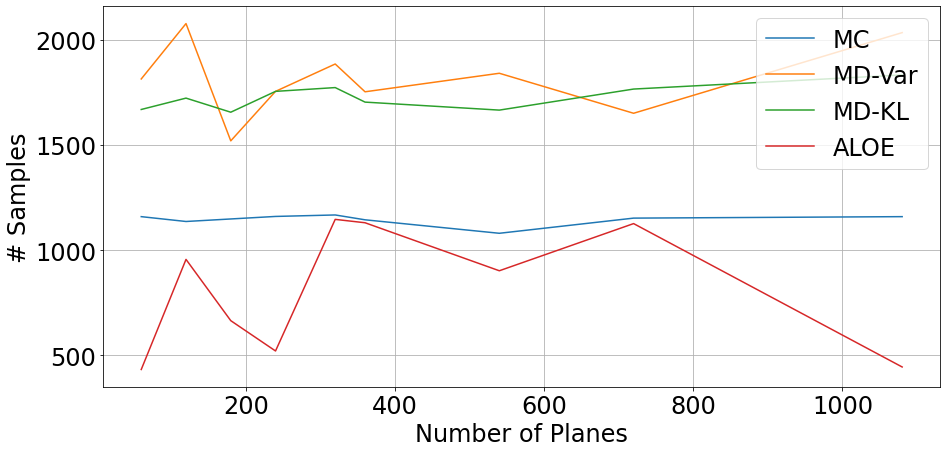

In [255]:
tmp = pd.DataFrame(complexities).T
tmp.columns = ['MC', 'MD-Var', 'MD-KL', 'ALOE']
ax = tmp.sort_index().plot(figsize=(15, 7), grid=True)

plt.legend(loc='upper right')
ax.set_xlabel('Number of Planes')
ax.set_ylabel('# Samples')
plt.savefig('sample_complexity_vs_n_of_planes.jpg')